In [1]:
%pylab inline

from matplotlib.mlab import griddata
from PyTools import nbins
from scipy.ndimage.filters import gaussian_filter
import paper_style, os

Populating the interactive namespace from numpy and matplotlib


In [9]:
rc("lines", linewidth=1.0)
rc("patch", linewidth=1.0)
rc("font", family="serif", serif="Times New Roman", weight="bold", size=9.0)
rc("text", usetex=True)
rc("savefig", dpi=92)
rc("axes", linewidth=0.5, labelsize=9.0, titlesize=9.0)
rc("legend", fontsize="xx-small")
rc("xtick.major", width=0.3)
rc("xtick", labelsize="small")
rc("ytick.major", width=0.3)
rc("ytick", labelsize="small")

od = os.path.expandvars("$HOME/Documents/Papers/photofit_near_paper/")

In [3]:
u_obs, g_obs, r_obs, i_obs, z_obs, redshift = loadtxt("../inputs/total_photometry.txt", usecols=range(1, 6)+[11], unpack=True)
u_obf, g_obf, r_obf, i_obf, z_obf, rs_sam = loadtxt("../outputs/real_deal6/ugriz_catalog_of.txt", usecols=range(1, 6)+[11], unpack=True)
u_ref, g_ref, r_ref, i_ref, z_ref = loadtxt("../outputs/real_deal6/ugriz_catalog_rf.txt", usecols=range(1, 6), unpack=True)

u_lib, g_lib, r_lib, i_lib, z_lib, Z = loadtxt("../inputs/set3_catalog.txt", usecols=range(39, 39 + 5)+[12], unpack=True)

In [4]:
zmask = redshift < 0.03
ocolor_x = (u_obs - g_obs)[zmask]
ocolor_y = (g_obs - r_obs)[zmask]
icolor_x = (u_obf - g_obf)
icolor_y = (g_obf - r_obf)
kcolor_x = (u_ref - g_ref)
kcolor_y = (g_ref - r_ref)
lcolor_x = (u_lib - g_lib)[log10(Z)>=-0.4]
lcolor_y = (g_lib - r_lib)[log10(Z)>=-0.4]

/home/chapi/mejia/Programs/miniconda/envs/phd/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in subtract
/home/chapi/mejia/Programs/miniconda/envs/phd/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in subtract
/home/chapi/mejia/Programs/miniconda/envs/phd/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in subtract
/home/chapi/mejia/Programs/miniconda/envs/phd/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in subtract


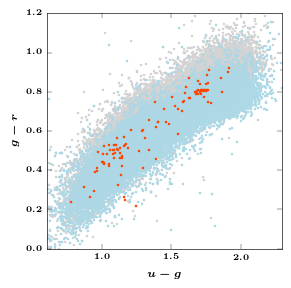

In [8]:
fig = figure(figsize=(3.3, 3.3))
xlm = array((0.6, 2.3))
ylm = array((0.0, 1.2))
axs = subplot(111, xlim=xlm, ylim=ylm)

axs.set_xlabel(r"$u-g$")
axs.set_ylabel(r"$g-r$")

#nx, xi, xf, bsx = nbins(ocolor_x)
#ny, yi, yf, bsy = nbins(ocolor_y)

#xbin = linspace(xi, xf, 51)
#ybin = linspace(yi, yf, 51)

#H, xe, ye = histogram2d(ocolor_x, ocolor_y, bins=(nx, ny), normed=True)
#H = gaussian_filter(H, sigma=3)

axs.scatter(icolor_x, icolor_y, lw=0, c="lightgray", s=4)
axs.scatter(kcolor_x, kcolor_y, lw=0, c="lightblue", s=4)
axs.scatter(lcolor_x, lcolor_y, lw=0, c="orangered", s=4)

#cont = axs.contour(xe[:- 1], ye[:- 1], H.T, 10, colors="0.2", linewidths=1.5)
#clabel(cont, inline=True, fmt="%.1f", fontsize=10)

savefig(od + "samples.pdf", bbox_inches="tight")